# 十分钟入门 Pandas

In [1]:
import numpy as np

import pandas as pd

# 生成对象 object-creation
---

用值列表生成 Series 时，Pandas 默认自动生成整数索引：

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

用含日期时间索引与标签的 NumPy 数组生成 DataFrame ：

In [19]:
dates = pd.date_range('20130101', periods=6)

dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-0.952008,-1.884322,0.304232,-0.728310
2013-01-02,-1.152620,-0.023535,-0.339995,1.632461
2013-01-03,-0.064363,-1.760031,-1.134183,0.105973
2013-01-04,-1.917089,-1.139279,-0.750057,0.875505
2013-01-05,-0.663622,0.127321,-0.861308,-1.402733
2013-01-06,1.390489,-1.185069,-1.792517,0.856189


用 Series 字典对象生成 DataFrame:

In [4]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


DataFrame 的列有不同数据类型。

In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据 viewing-data
---
查看 DataFrame 头部和尾部数据：

In [6]:
df.head

df.tail(3)

,A,B,C,D
2021-12-15,-2.218056,-0.103874,1.313427,-0.783677
2021-12-16,0.435264,-1.060215,-0.713016,-0.244315
2021-12-17,-0.954491,-0.929230,-0.461560,-1.877273


显示索引与列名：

In [7]:
df.index

df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() 输出底层数据的 NumPy 对象。

DataFrame.to_numpy() 的输出不包含行索引和列标签

df 这个 DataFrame 里的值都是浮点数，DataFrame.to_numpy() 的操作会很快，而且不复制数据。

In [8]:
df.to_numpy()

array([[-2.14757203, -1.24942395, -0.42143462, -1.04387454],
       [-0.20992466, -1.2598119 , -0.11491146, -1.52270852],
       [ 1.80077402,  0.63760864,  0.08118179,  0.37367259],
       [-2.21805605, -0.10387359,  1.31342712, -0.78367681],
       [ 0.43526392, -1.06021453, -0.71301628, -0.24431467],
       [-0.95449051, -0.92923044, -0.4615597 , -1.87727309]])

df2 这个 DataFrame 包含了多种类型，DataFrame.to_numpy() 操作就会耗费较多资源。

In [9]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe() 可以快速查看数据的统计摘要：

In [10]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.549001,-0.660824,-0.052719,-0.849696
std,1.556328,0.765887,0.724879,0.826322
min,-2.218056,-1.259812,-0.713016,-1.877273
25%,-1.849302,-1.202122,-0.451528,-1.403000
50%,-0.582208,-0.994722,-0.268173,-0.913776
75%,0.273967,-0.310213,0.032158,-0.379155
max,1.800774,0.637609,1.313427,0.373673


转置数据：

In [11]:
df.T

,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17
A,-2.147572,-0.209925,1.800774,-2.218056,0.435264,-0.954491
B,-1.249424,-1.259812,0.637609,-0.103874,-1.060215,-0.929230
C,-0.421435,-0.114911,0.081182,1.313427,-0.713016,-0.461560
D,-1.043875,-1.522709,0.373673,-0.783677,-0.244315,-1.877273


按轴排序：

In [12]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-12-12,-1.043875,-0.421435,-1.249424,-2.147572
2021-12-13,-1.522709,-0.114911,-1.259812,-0.209925
2021-12-14,0.373673,0.081182,0.637609,1.800774
2021-12-15,-0.783677,1.313427,-0.103874,-2.218056
2021-12-16,-0.244315,-0.713016,-1.060215,0.435264
2021-12-17,-1.877273,-0.461560,-0.929230,-0.954491


按值排序：

In [13]:
df.sort_values(by='B')

,A,B,C,D
2021-12-13,-0.209925,-1.259812,-0.114911,-1.522709
2021-12-12,-2.147572,-1.249424,-0.421435,-1.043875
2021-12-16,0.435264,-1.060215,-0.713016,-0.244315
2021-12-17,-0.954491,-0.929230,-0.461560,-1.877273
2021-12-15,-2.218056,-0.103874,1.313427,-0.783677
2021-12-14,1.800774,0.637609,0.081182,0.373673


## 选择
### 获取数据
选择单列，产生 Series，df['A'] 与 df.A 等效：

In [14]:
df['A']

2021-12-12   -2.147572
2021-12-13   -0.209925
2021-12-14    1.800774
2021-12-15   -2.218056
2021-12-16    0.435264
2021-12-17   -0.954491
Freq: D, Name: A, dtype: float64

用 [ ] 切片行：

In [15]:
df[0:3]

df['20211214':'20211216']

,A,B,C,D
2021-12-14,1.800774,0.637609,0.081182,0.373673
2021-12-15,-2.218056,-0.103874,1.313427,-0.783677
2021-12-16,0.435264,-1.060215,-0.713016,-0.244315


### 按标签选择
用标签提取一行数据：

In [16]:
df.loc[dates[0]]

A   -2.147572
B   -1.249424
C   -0.421435
D   -1.043875
Name: 2021-12-12 00:00:00, dtype: float64

 用标签选择多列数据：

In [17]:
df.loc[:, ['A', 'B']]

,A,B
2021-12-12,-2.147572,-1.249424
2021-12-13,-0.209925,-1.259812
2021-12-14,1.800774,0.637609
2021-12-15,-2.218056,-0.103874
2021-12-16,0.435264,-1.060215
2021-12-17,-0.954491,-0.929230


用标签切片，包含行与列结束点：



In [20]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.152620,-0.023535
2013-01-03,-0.064363,-1.760031
2013-01-04,-1.917089,-1.139279


返回对象降维：

In [21]:
df.loc['20130102', ['A', 'B']]

A   -1.152620
B   -0.023535
Name: 2013-01-02 00:00:00, dtype: float64

提取标量值：

In [22]:
df.loc[dates[0], 'A']

-0.9520078239729454

快速访问标量，与上述方法等效：

In [23]:
df.at[dates[0], 'A']

-0.9520078239729454

### 按位置选择

用整数位置选择：

In [24]:
df.iloc[3]

A   -1.917089
B   -1.139279
C   -0.750057
D    0.875505
Name: 2013-01-04 00:00:00, dtype: float64

类似 NumPy / Python，用整数切片：

In [25]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.917089,-1.139279
2013-01-05,-0.663622,0.127321


类似 NumPy / Python，用整数列表按位置切片：

In [26]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.152620,-0.339995
2013-01-03,-0.064363,-1.134183
2013-01-05,-0.663622,-0.861308


显式整行切片：

In [27]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.152620,-0.023535,-0.339995,1.632461
2013-01-03,-0.064363,-1.760031,-1.134183,0.105973


显式整列切片：

In [28]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.884322,0.304232
2013-01-02,-0.023535,-0.339995
2013-01-03,-1.760031,-1.134183
2013-01-04,-1.139279,-0.750057
2013-01-05,0.127321,-0.861308
2013-01-06,-1.185069,-1.792517


显式提取值：

In [29]:
df.iloc[1, 1]

-0.023535085051517936

快速访问标量，与上述方法等效：

In [30]:
df.iat[1, 1]

-0.023535085051517936

### 布尔索引

用单列的值选择数据：

In [31]:
df[df.A > 0]

,A,B,C,D
2013-01-06,1.390489,-1.185069,-1.792517,0.856189


选择 DataFrame 里满足条件的值：

In [32]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.304232,NaN
2013-01-02,NaN,NaN,NaN,1.632461
2013-01-03,NaN,NaN,NaN,0.105973
2013-01-04,NaN,NaN,NaN,0.875505
2013-01-05,NaN,0.127321,NaN,NaN
2013-01-06,1.390489,NaN,NaN,0.856189


用 isin()筛选：

In [34]:
df2 = df.copy()

df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

df2

,A,B,C,D,E
2013-01-01,-0.952008,-1.884322,0.304232,-0.728310,one
2013-01-02,-1.152620,-0.023535,-0.339995,1.632461,one
2013-01-03,-0.064363,-1.760031,-1.134183,0.105973,two
2013-01-04,-1.917089,-1.139279,-0.750057,0.875505,three
2013-01-05,-0.663622,0.127321,-0.861308,-1.402733,four
2013-01-06,1.390489,-1.185069,-1.792517,0.856189,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.064363,-1.760031,-1.134183,0.105973,two
2013-01-05,-0.663622,0.127321,-0.861308,-1.402733,four


### 赋值
用索引自动对齐新增列的数据：

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

按标签赋值：

In [37]:
df.at[dates[0], 'A'] = 0

按位置赋值：

In [38]:
df.iat[0, 1] = 0

按 NumPy 数组赋值：

In [39]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述赋值结果：

In [40]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.304232,5
2013-01-02,-1.152620,-0.023535,-0.339995,5
2013-01-03,-0.064363,-1.760031,-1.134183,5
2013-01-04,-1.917089,-1.139279,-0.750057,5
2013-01-05,-0.663622,0.127321,-0.861308,5
2013-01-06,1.390489,-1.185069,-1.792517,5


用 where 条件赋值：

In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.304232,-5
2013-01-02,-1.152620,-0.023535,-0.339995,-5
2013-01-03,-0.064363,-1.760031,-1.134183,-5
2013-01-04,-1.917089,-1.139279,-0.750057,-5
2013-01-05,-0.663622,-0.127321,-0.861308,-5
2013-01-06,-1.390489,-1.185069,-1.792517,-5


## 缺失值
---
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。

重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.304232,5,1.0
2013-01-02,-1.152620,-0.023535,-0.339995,5,1.0
2013-01-03,-0.064363,-1.760031,-1.134183,5,NaN
2013-01-04,-1.917089,-1.139279,-0.750057,5,NaN


删除所有含缺失值的行：

In [44]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.00000,0.000000,0.304232,5,1.0
2013-01-02,-1.15262,-0.023535,-0.339995,5,1.0


填充缺失值：

In [45]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.304232,5,1.0
2013-01-02,-1.152620,-0.023535,-0.339995,5,1.0
2013-01-03,-0.064363,-1.760031,-1.134183,5,5.0
2013-01-04,-1.917089,-1.139279,-0.750057,5,5.0


提取 nan 值的布尔掩码：

In [46]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 运算
---
### 统计
一般情况下，运算时排除缺失值。

描述性统计：

In [47]:
df.mean()

A   -0.401201
B   -0.663432
C   -0.762305
D    5.000000
dtype: float64

在另一个轴(即，行)上执行同样的操作：

In [48]:
df.mean(1)

2013-01-01    1.326058
2013-01-02    0.870962
2013-01-03    0.510356
2013-01-04    0.298394
2013-01-05    0.900598
2013-01-06    0.853226
Freq: D, dtype: float64

不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播。

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.064363,-2.760031,-2.134183,4.0
2013-01-04,-4.917089,-4.139279,-3.750057,2.0
2013-01-05,-5.663622,-4.872679,-5.861308,0.0
2013-01-06,NaN,NaN,NaN,NaN


### Apply 函数
Apply 函数处理数据：

In [52]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.304232,5
2013-01-02,-1.152620,-0.023535,-0.035763,10
2013-01-03,-1.216983,-1.783566,-1.169946,15
2013-01-04,-3.134071,-2.922845,-1.920002,20
2013-01-05,-3.797694,-2.795524,-2.781310,25
2013-01-06,-2.407205,-3.980593,-4.573828,30


In [53]:
df.apply(lambda x: x.max() - x.min())

A    3.307577
B    1.887352
C    2.096750
D    0.000000
dtype: float64

### 直方图

In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    3
1    0
2    4
3    6
4    2
5    0
6    6
7    4
8    5
9    6
dtype: int64

In [56]:
s.value_counts()

6    3
0    2
4    2
3    1
2    1
5    1
dtype: int64

### 字符串方法
Series 的 str 属性包含一组字符串处理功能，如下列代码所示。注意，str 的模式匹配默认使用正则表达式。详见矢量字符串方法。

In [58]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并（Merge）
---
### 结合（Concat）
Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。

concat()用于连接 Pandas 对象：

In [59]:
df = pd.DataFrame(np.random.randn(10, 4))


df

,0,1,2,3
0,1.136539,0.230323,0.179177,-1.021469
1,0.326475,-1.650442,-0.738339,-0.666435
2,0.038669,0.663539,0.593865,0.083057
3,0.958208,-0.783331,-1.564526,0.465333
4,-0.371121,-1.066321,-1.725976,-0.494500
5,0.221863,0.214783,0.481294,-0.985865
6,-1.301369,-2.705701,-0.701836,-1.542968
7,0.718658,0.044791,-1.863077,1.207185
8,-0.791844,-1.132829,0.090640,-1.446459
9,-1.133442,1.288930,-0.824564,-1.880071


In [60]:
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.136539,0.230323,0.179177,-1.021469
1,0.326475,-1.650442,-0.738339,-0.666435
2,0.038669,0.663539,0.593865,0.083057
3,0.958208,-0.783331,-1.564526,0.465333
4,-0.371121,-1.066321,-1.725976,-0.494500
5,0.221863,0.214783,0.481294,-0.985865
6,-1.301369,-2.705701,-0.701836,-1.542968
7,0.718658,0.044791,-1.863077,1.207185
8,-0.791844,-1.132829,0.090640,-1.446459
9,-1.133442,1.288930,-0.824564,-1.880071


### 连接（join）
SQL 风格的合并。

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


还有一个例子：

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,bar,2


In [65]:
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 追加（Append）
为 DataFrame 追加行。

In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,-1.859444,0.264114,-0.067597,-0.642664
1,-2.417302,-1.449039,0.475490,0.012984
2,0.148193,1.848284,-1.860780,-0.354488
3,-0.435988,0.112882,0.015308,0.836472
4,0.435033,0.049161,0.761288,-0.877544
5,-0.296847,0.999742,1.491720,-0.200635
6,0.470863,1.486161,-0.152719,-0.623945
7,1.490966,-0.495555,-1.840423,0.977804


In [68]:
s = df.iloc[3]

In [69]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.859444,0.264114,-0.067597,-0.642664
1,-2.417302,-1.449039,0.475490,0.012984
2,0.148193,1.848284,-1.860780,-0.354488
3,-0.435988,0.112882,0.015308,0.836472
4,0.435033,0.049161,0.761288,-0.877544
5,-0.296847,0.999742,1.491720,-0.200635
6,0.470863,1.486161,-0.152719,-0.623945
7,1.490966,-0.495555,-1.840423,0.977804
8,-0.435988,0.112882,0.015308,0.836472


## 分组（Grouping）
---
“group by” 指的是涵盖下列一项或多项步骤的处理流程：
- 分割：按条件把数据分割成多组；
- 应用：为每组单独应用函数；
- 组合：将处理结果组合成一个数据结构。

In [70]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                      'B': ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                      'C': np.random.randn(8),
                      'D': np.random.randn(8)})

In [71]:
df

,A,B,C,D
0,foo,one,0.510218,-0.692043
1,bar,one,0.136329,-1.158422
2,foo,two,0.445642,2.383344
3,bar,three,1.069914,0.062265
4,foo,two,0.740065,0.396523
5,bar,two,-1.034610,1.115850
6,foo,one,0.363782,-0.244468
7,foo,three,1.342941,-0.572301


先分组，再用 sum()函数计算每组的汇总数据：

In [72]:
df.groupby('A').sum()

,C,D
A,,
bar,0.171634,0.019694
foo,3.402648,1.271056


多列分组后，生成多层索引，也可以应用 sum 函数：

In [73]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.136329 -1.158422
    three  1.069914  0.062265
    two   -1.034610  1.115850
foo one    0.874000 -0.936511
    three  1.342941 -0.572301
    two    1.185707  2.779867

## 重塑（Reshaping）
---
### 堆叠（Stack）

In [74]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [75]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [76]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [77]:
df2 = df[:4]

In [78]:
df2

A         B
first second                    
bar   one    -0.729842  0.422815
      two     0.331466  0.349885
baz   one     0.101401  0.963051
      two    -1.802652  1.814684

stack()方法把 DataFrame 列压缩至一层：

In [79]:
stacked = df2.stack()

In [80]:
stacked

first  second   
bar    one     A   -0.729842
               B    0.422815
       two     A    0.331466
               B    0.349885
baz    one     A    0.101401
               B    0.963051
       two     A   -1.802652
               B    1.814684
dtype: float64

压缩后的 DataFrame 或 Series 具有多层索引， stack() 的逆操作是 unstack() ，默认为拆叠最后一层：

In [81]:
stacked.unstack()

A         B
first second                    
bar   one    -0.729842  0.422815
      two     0.331466  0.349885
baz   one     0.101401  0.963051
      two    -1.802652  1.814684

In [82]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.729842  0.331466
      B  0.422815  0.349885
baz   A  0.101401 -1.802652
      B  0.963051  1.814684

In [83]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.729842  0.101401
       B  0.422815  0.963051
two    A  0.331466 -1.802652
       B  0.349885  1.814684

## 数据透视表（Pivot Tables）
---

In [84]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [85]:
df

,A,B,C,D,E
0,one,A,foo,-0.873487,-1.260776
1,one,B,foo,1.205879,-0.858639
2,two,C,foo,-0.826168,0.229974
3,three,A,bar,1.100595,-1.025490
4,one,B,bar,0.028254,-0.952010
5,one,C,bar,-1.137342,-1.687981
6,two,A,foo,-1.050203,-0.298920
7,three,B,foo,0.250859,-0.341243
8,one,C,foo,-0.550216,-0.154473
9,one,A,bar,-1.023489,-1.575019


用上述数据生成数据透视表非常简单：

In [86]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.023489 -0.873487
      B  0.028254  1.205879
      C -1.137342 -0.550216
three A  1.100595       NaN
      B       NaN  0.250859
      C -0.792806       NaN
two   A       NaN -1.050203
      B -1.754684       NaN
      C       NaN -0.826168

## 时间序列(TimeSeries)
---
Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。

In [87]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [88]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [89]:
ts.resample('5Min').sum()

2012-01-01    24179
Freq: 5T, dtype: int64

时区表示：

In [90]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [91]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [92]:
ts

2012-03-06   -0.450385
2012-03-07    0.680228
2012-03-08    0.083323
2012-03-09   -1.559274
2012-03-10    0.424167
Freq: D, dtype: float64

In [93]:
ts_utc = ts.tz_localize('UTC')

In [94]:
ts_utc

2012-03-06 00:00:00+00:00   -0.450385
2012-03-07 00:00:00+00:00    0.680228
2012-03-08 00:00:00+00:00    0.083323
2012-03-09 00:00:00+00:00   -1.559274
2012-03-10 00:00:00+00:00    0.424167
Freq: D, dtype: float64

转换成其它时区：

In [95]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.450385
2012-03-06 19:00:00-05:00    0.680228
2012-03-07 19:00:00-05:00    0.083323
2012-03-08 19:00:00-05:00   -1.559274
2012-03-09 19:00:00-05:00    0.424167
Freq: D, dtype: float64

转换时间段：

In [96]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [97]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [98]:
ts

2012-01-31    0.633597
2012-02-29    0.333274
2012-03-31    0.146649
2012-04-30   -0.670650
2012-05-31    0.227407
Freq: M, dtype: float64

In [99]:
ps = ts.to_period()

In [100]:
ps

2012-01    0.633597
2012-02    0.333274
2012-03    0.146649
2012-04   -0.670650
2012-05    0.227407
Freq: M, dtype: float64

In [101]:
ps.to_timestamp()

2012-01-01    0.633597
2012-02-01    0.333274
2012-03-01    0.146649
2012-04-01   -0.670650
2012-05-01    0.227407
Freq: MS, dtype: float64

Pandas 函数可以很方便地转换时间段与时间戳。下例把以 11 月为结束年份的季度频率转换为下一季度月末上午 9 点：

In [102]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [103]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [104]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [105]:
ts.head()

1990-03-01 09:00    0.145315
1990-06-01 09:00   -0.369812
1990-09-01 09:00   -0.803116
1990-12-01 09:00    1.518791
1991-03-01 09:00   -1.366132
Freq: H, dtype: float64

## 类别型（Categoricals）
---
Pandas 的 DataFrame 里可以包含类别数据。

In [106]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

将 grade 的原生数据转换为类别型数据：

In [107]:
df["grade"] = df["raw_grade"].astype("category")

In [108]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

用有含义的名字重命名不同类型，调用 Series.cat.categories。

In [109]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序各类别，并添加缺失类，Series.cat 的方法默认返回新 Series。

In [110]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [111]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

注意，这里是按生成类别时的顺序排序，不是按词汇排序：

In [112]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按类列分组（groupby）时，即便某类别为空，也会显示：

In [113]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 可视化
---

In [121]:
import matplotlib.pyplot as plt

In [122]:
plt.close("all")

The close() method is used to close a figure window.

In [123]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

In [124]:
ts = ts.cumsum()

<AxesSubplot:>

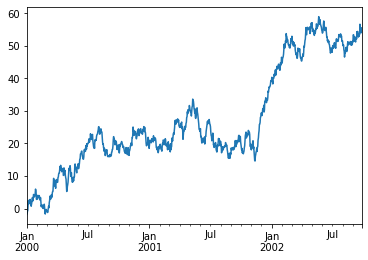

In [125]:
ts.plot()

DataFrame 的 plot()方法可以快速绘制所有带标签的列：

In [126]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [127]:
df = df.cumsum()

In [128]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

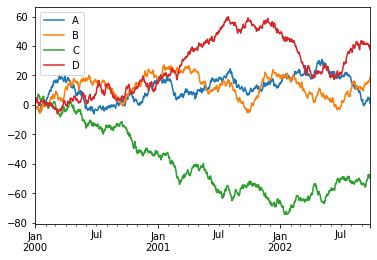

In [129]:
df.plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


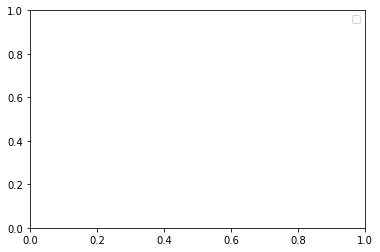

In [130]:
plt.legend(loc='best');

## 数据输入 / 输出
---
### CSV

In [131]:
df.to_csv('foo.csv')

读取 CSV 文件数据：

In [132]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.649543,0.474555,0.310167,0.277709
1,2000-01-02,-0.794630,-1.311605,1.993841,1.035001
2,2000-01-03,-2.720712,-1.117190,1.845404,1.539788
3,2000-01-04,-1.231159,-1.946560,3.267372,2.587029
4,2000-01-05,-1.601565,-2.095949,3.900585,4.184288
...,...,...,...,...,...
995,2002-09-22,4.720370,16.123691,-47.599337,39.997186
996,2002-09-23,4.850303,16.289625,-48.961408,40.759035
997,2002-09-24,3.109755,15.695916,-48.041304,39.799454
998,2002-09-25,3.190181,16.735559,-47.157897,38.693820


### HDF5
写入 HDF5 Store：

In [134]:
df.to_hdf('foo.h5', 'df')

读取 HDF5 Store：

In [135]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.649543,0.474555,0.310167,0.277709
2000-01-02,-0.794630,-1.311605,1.993841,1.035001
2000-01-03,-2.720712,-1.117190,1.845404,1.539788
2000-01-04,-1.231159,-1.946560,3.267372,2.587029
2000-01-05,-1.601565,-2.095949,3.900585,4.184288
...,...,...,...,...
2002-09-22,4.720370,16.123691,-47.599337,39.997186
2002-09-23,4.850303,16.289625,-48.961408,40.759035
2002-09-24,3.109755,15.695916,-48.041304,39.799454
2002-09-25,3.190181,16.735559,-47.157897,38.693820


### Excel
写入 Excel 文件：

In [137]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取 Excel 文件：

In [138]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.649543,0.474555,0.310167,0.277709
1,2000-01-02,-0.794630,-1.311605,1.993841,1.035001
2,2000-01-03,-2.720712,-1.117190,1.845404,1.539788
3,2000-01-04,-1.231159,-1.946560,3.267372,2.587029
4,2000-01-05,-1.601565,-2.095949,3.900585,4.184288
...,...,...,...,...,...
995,2002-09-22,4.720370,16.123691,-47.599337,39.997186
996,2002-09-23,4.850303,16.289625,-48.961408,40.759035
997,2002-09-24,3.109755,15.695916,-48.041304,39.799454
998,2002-09-25,3.190181,16.735559,-47.157897,38.693820
